# Exploratory Data Analysis

In [1]:
pip show pandas

Name: pandas
Version: 2.2.2
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: 
Author-email: The Pandas Development Team <pandas-dev@python.org>
License: BSD 3-Clause License

Copyright (c) 2008-2011, AQR Capital Management, LLC, Lambda Foundry, Inc. and PyData Development Team
All rights reserved.

Copyright (c) 2011-2023, Open source contributors.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:

* Redistributions of source code must retain the above copyright notice, this
  list of conditions and the following disclaimer.

* Redistributions in binary form must reproduce the above copyright notice,
  this list of conditions and the following disclaimer in the documentation
  and/or other materials provided with the distribution.

* Neither the name of the copyright holder nor the names of its
  contributors may be u

In [2]:
pip show matplotlib

Name: matplotlib
Version: 3.9.2
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: Unknown <matplotlib-users@python.org>
License: License agreement for matplotlib versions 1.3.0 and later

1. This LICENSE AGREEMENT is between the Matplotlib Development Team
("MDT"), and the Individual or Organization ("Licensee") accessing and
otherwise using matplotlib software in source or binary form and its
associated documentation.

2. Subject to the terms and conditions of this License Agreement, MDT
hereby grants Licensee a nonexclusive, royalty-free, world-wide license
to reproduce, analyze, test, perform and/or display publicly, prepare
derivative works, distribute, and otherwise use matplotlib
alone or in any derivative version, provided, however, that MDT's
License Agreement and MDT's notice of copyright, i.e., "Copyright (c)
2012- Matplotlib Development Team; All Rights Reserved" are retained in
matplotlib  alone or in

In [3]:
pip show seaborn

Name: seaborn
Version: 0.13.2
Summary: Statistical data visualization
Home-page: 
Author: 
Author-email: Michael Waskom <mwaskom@gmail.com>
License: 
Location: /home/coke/anaconda3/lib/python3.12/site-packages
Requires: matplotlib, numpy, pandas
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
seed=9603
carpetas = (
    "MachineLearningCVE",
    "TrafficLabelling"
)
archivos_csv = (
    "monday",
    "tuesday",
    "wednesday",
    "thursday_morning_webattacks",
    "thursday_afternoon_infilteration",
    "friday_morning",
    "friday_afternoon_portscan",
    "friday_afternoon_ddos",
)

## Carga de datos

In [6]:
df = pd.concat(
    [pd.read_csv(f"DB/{carpetas[0]}/{i}.csv", sep=",") for i in archivos_csv],
    ignore_index=True
)

In [7]:
df.head()
# Separar en diferentes dataframes según los tipos de características

Destination Port   Flow Duration   Total Fwd Packets  \
0              49188               4                   2   
1              49188               1                   2   
2              49188               1                   2   
3              49188               1                   2   
4              49486               3                   2   

    Total Backward Packets  Total Length of Fwd Packets  \
0                        0                           12   
1                        0                           12   
2                        0                           12   
3                        0                           12   
4                        0                           12   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                             0                       6   
1                             0                       6   
2                             0                       6   
3                             0                       6   
4                             0                       6   

    Fwd Packet Length Min   Fwd Packet Length Mean   Fwd Packet Length Std  \
0                       6                      6.0                     0.0   
1                       6                      6.0                     0.0   
2                       6                      6.0                     0.0   
3                       6                      6.0                     0.0   
4                       6                      6.0                     0.0   

   ...   min_seg_size_forward  Active Mean   Active Std   Active Max  \
0  ...                     20          0.0          0.0            0   
1  ...                     20          0.0          0.0            0   
2  ...                     20          0.0          0.0            0   
3  ...                     20          0.0          0.0            0   
4  ...                     20          0.0          0.0            0   

    Active Min  Idle Mean   Idle Std   Idle Max   Idle Min   Label  
0            0        0.0        0.0          0          0  BENIGN  
1            0        0.0        0.0          0          0  BENIGN  
2            0        0.0        0.0          0          0  BENIGN  
3            0        0.0        0.0          0          0  BENIGN  
4            0        0.0        0.0          0          0  BENIGN  

[5 rows x 79 columns]

## Limpieza de datos categóricos

Observar las características contenidas en el dataset

In [8]:
print(df.columns)
print(f"Total de características: {len(df.columns)}")

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

Eliminamos los espacios, pasamos a minusculas las letras de las columnas y reemplazamos los espacios restantes en los nombres de las columnas para manejar las columnas de forma más ágil.

In [9]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df.columns

Index(['destination_port', 'flow_duration', 'total_fwd_packets',
       'total_backward_packets', 'total_length_of_fwd_packets',
       'total_length_of_bwd_packets', 'fwd_packet_length_max',
       'fwd_packet_length_min', 'fwd_packet_length_mean',
       'fwd_packet_length_std', 'bwd_packet_length_max',
       'bwd_packet_length_min', 'bwd_packet_length_mean',
       'bwd_packet_length_std', 'flow_bytes/s', 'flow_packets/s',
       'flow_iat_mean', 'flow_iat_std', 'flow_iat_max', 'flow_iat_min',
       'fwd_iat_total', 'fwd_iat_mean', 'fwd_iat_std', 'fwd_iat_max',
       'fwd_iat_min', 'bwd_iat_total', 'bwd_iat_mean', 'bwd_iat_std',
       'bwd_iat_max', 'bwd_iat_min', 'fwd_psh_flags', 'bwd_psh_flags',
       'fwd_urg_flags', 'bwd_urg_flags', 'fwd_header_length',
       'bwd_header_length', 'fwd_packets/s', 'bwd_packets/s',
       'min_packet_length', 'max_packet_length', 'packet_length_mean',
       'packet_length_std', 'packet_length_variance', 'fin_flag_count',
       'syn_flag_co

Cambiamos también las etiquetas de la columna label

In [10]:
df["label"].unique()

array(['BENIGN', 'FTP-Patator', 'SSH-Patator', 'DoS slowloris',
       'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye', 'Heartbleed',
       'Web Attack � Brute Force', 'Web Attack � XSS',
       'Web Attack � Sql Injection', 'Infiltration', 'Bot', 'PortScan',
       'DDoS'], dtype=object)

Cambiaremos caracteres desconocidos y espacios por "_", asimismo, se convertirán los caracteres a mayuscula

In [11]:
df["label"] = df["label"].str.upper().str.replace("� ", "").str.replace(" ", "_").str.replace("-", "_")
df["label"].unique()

array(['BENIGN', 'FTP_PATATOR', 'SSH_PATATOR', 'DOS_SLOWLORIS',
       'DOS_SLOWHTTPTEST', 'DOS_HULK', 'DOS_GOLDENEYE', 'HEARTBLEED',
       'WEB_ATTACK_BRUTE_FORCE', 'WEB_ATTACK_XSS',
       'WEB_ATTACK_SQL_INJECTION', 'INFILTRATION', 'BOT', 'PORTSCAN',
       'DDOS'], dtype=object)

In [12]:
# Observar el cambio de nombre de columnas
df.head()
df.tail()

destination_port  flow_duration  total_fwd_packets  \
2830738             61374             61                  1   
2830739             61378             72                  1   
2830740             61375             75                  1   
2830741             61323             48                  2   
2830742             61326             68                  1   

         total_backward_packets  total_length_of_fwd_packets  \
2830738                       1                            6   
2830739                       1                            6   
2830740                       1                            6   
2830741                       0                           12   
2830742                       1                            6   

         total_length_of_bwd_packets  fwd_packet_length_max  \
2830738                            6                      6   
2830739                            6                      6   
2830740                            6                      6   
2830741                            0                      6   
2830742                            6                      6   

         fwd_packet_length_min  fwd_packet_length_mean  fwd_packet_length_std  \
2830738                      6                     6.0                    0.0   
2830739                      6                     6.0                    0.0   
2830740                      6                     6.0                    0.0   
2830741                      6                     6.0                    0.0   
2830742                      6                     6.0                    0.0   

         ...  min_seg_size_forward  active_mean  active_std  active_max  \
2830738  ...                    20          0.0         0.0           0   
2830739  ...                    20          0.0         0.0           0   
2830740  ...                    20          0.0         0.0           0   
2830741  ...                    20          0.0         0.0           0   
2830742  ...                    20          0.0         0.0           0   

         active_min  idle_mean  idle_std  idle_max  idle_min   label  
2830738           0        0.0       0.0         0         0  BENIGN  
2830739           0        0.0       0.0         0         0  BENIGN  
2830740           0        0.0       0.0         0         0  BENIGN  
2830741           0        0.0       0.0         0         0  BENIGN  
2830742           0        0.0       0.0         0         0  BENIGN  

[5 rows x 79 columns]

Guardamos las características en un archivo excel

In [13]:
df_columns = pd.DataFrame(df.columns.tolist(), columns=["columns"])
df_columns.to_excel("columns.xlsx", index=False)

## Visualización de datos

### 1. Frecuencia de ciberataques

In [14]:
# Frecuencia de tipos de ciberataques
frecuencia = df["label"].value_counts()
porcentaje = df["label"].value_counts(normalize=True) * 100

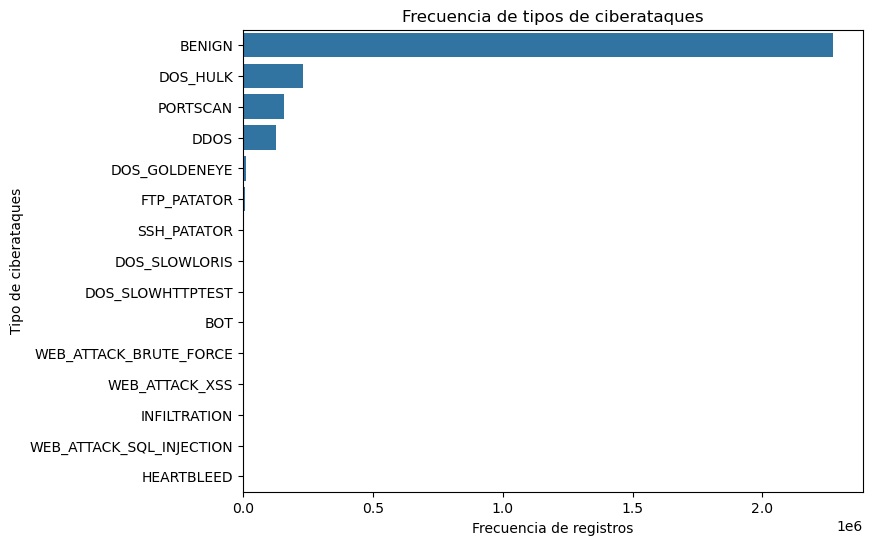

In [15]:
# Gráfico de barras de tipos de ciberataques
plt.figure(figsize=(8, 6))
sns.barplot(x=frecuencia.values, y=frecuencia.index)

plt.xlabel("Frecuencia de registros")
plt.ylabel("Tipo de ciberataques")
plt.title("Frecuencia de tipos de ciberataques") 

plt.show()

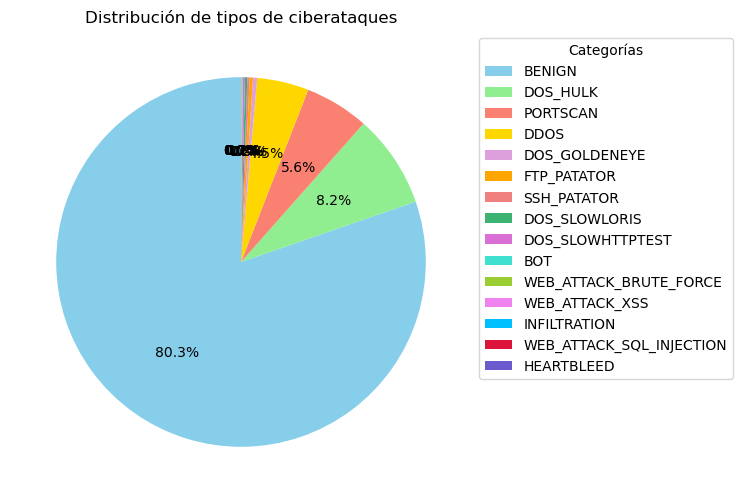

In [16]:
# Gráfico circular de tipos de ciberataques
plt.figure(figsize=(8, 6))
plt.pie(
    frecuencia, 
    labels=None, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=[
        'skyblue', 'lightgreen', 'salmon', 'gold', 'plum',
        'orange', 'lightcoral', 'mediumseagreen', 'orchid', 'turquoise',
        'yellowgreen', 'violet', 'deepskyblue', 'crimson', 'slateblue'
    ]
)

plt.title('Distribución de tipos de ciberataques')
plt.legend(
  frecuencia.index, 
  title='Categorías', 
  loc='upper left', 
  bbox_to_anchor=(1, 1)
)

plt.show()

In [17]:
# Tabla de frecuencia de tipos de ciberataques

tabla_frecuencia = pd.DataFrame({
  "Frecuencia": frecuencia,
  "Porcentaje": porcentaje
})

tabla_frecuencia["Porcentaje"].round(2)

print(tabla_frecuencia)

                          Frecuencia  Porcentaje
label                                           
BENIGN                       2273097   80.300366
DOS_HULK                      231073    8.162981
PORTSCAN                      158930    5.614427
DDOS                          128027    4.522735
DOS_GOLDENEYE                  10293    0.363615
FTP_PATATOR                     7938    0.280421
SSH_PATATOR                     5897    0.208320
DOS_SLOWLORIS                   5796    0.204752
DOS_SLOWHTTPTEST                5499    0.194260
BOT                             1966    0.069452
WEB_ATTACK_BRUTE_FORCE          1507    0.053237
WEB_ATTACK_XSS                   652    0.023033
INFILTRATION                      36    0.001272
WEB_ATTACK_SQL_INJECTION          21    0.000742
HEARTBLEED                        11    0.000389


### 2. Visualización de datos

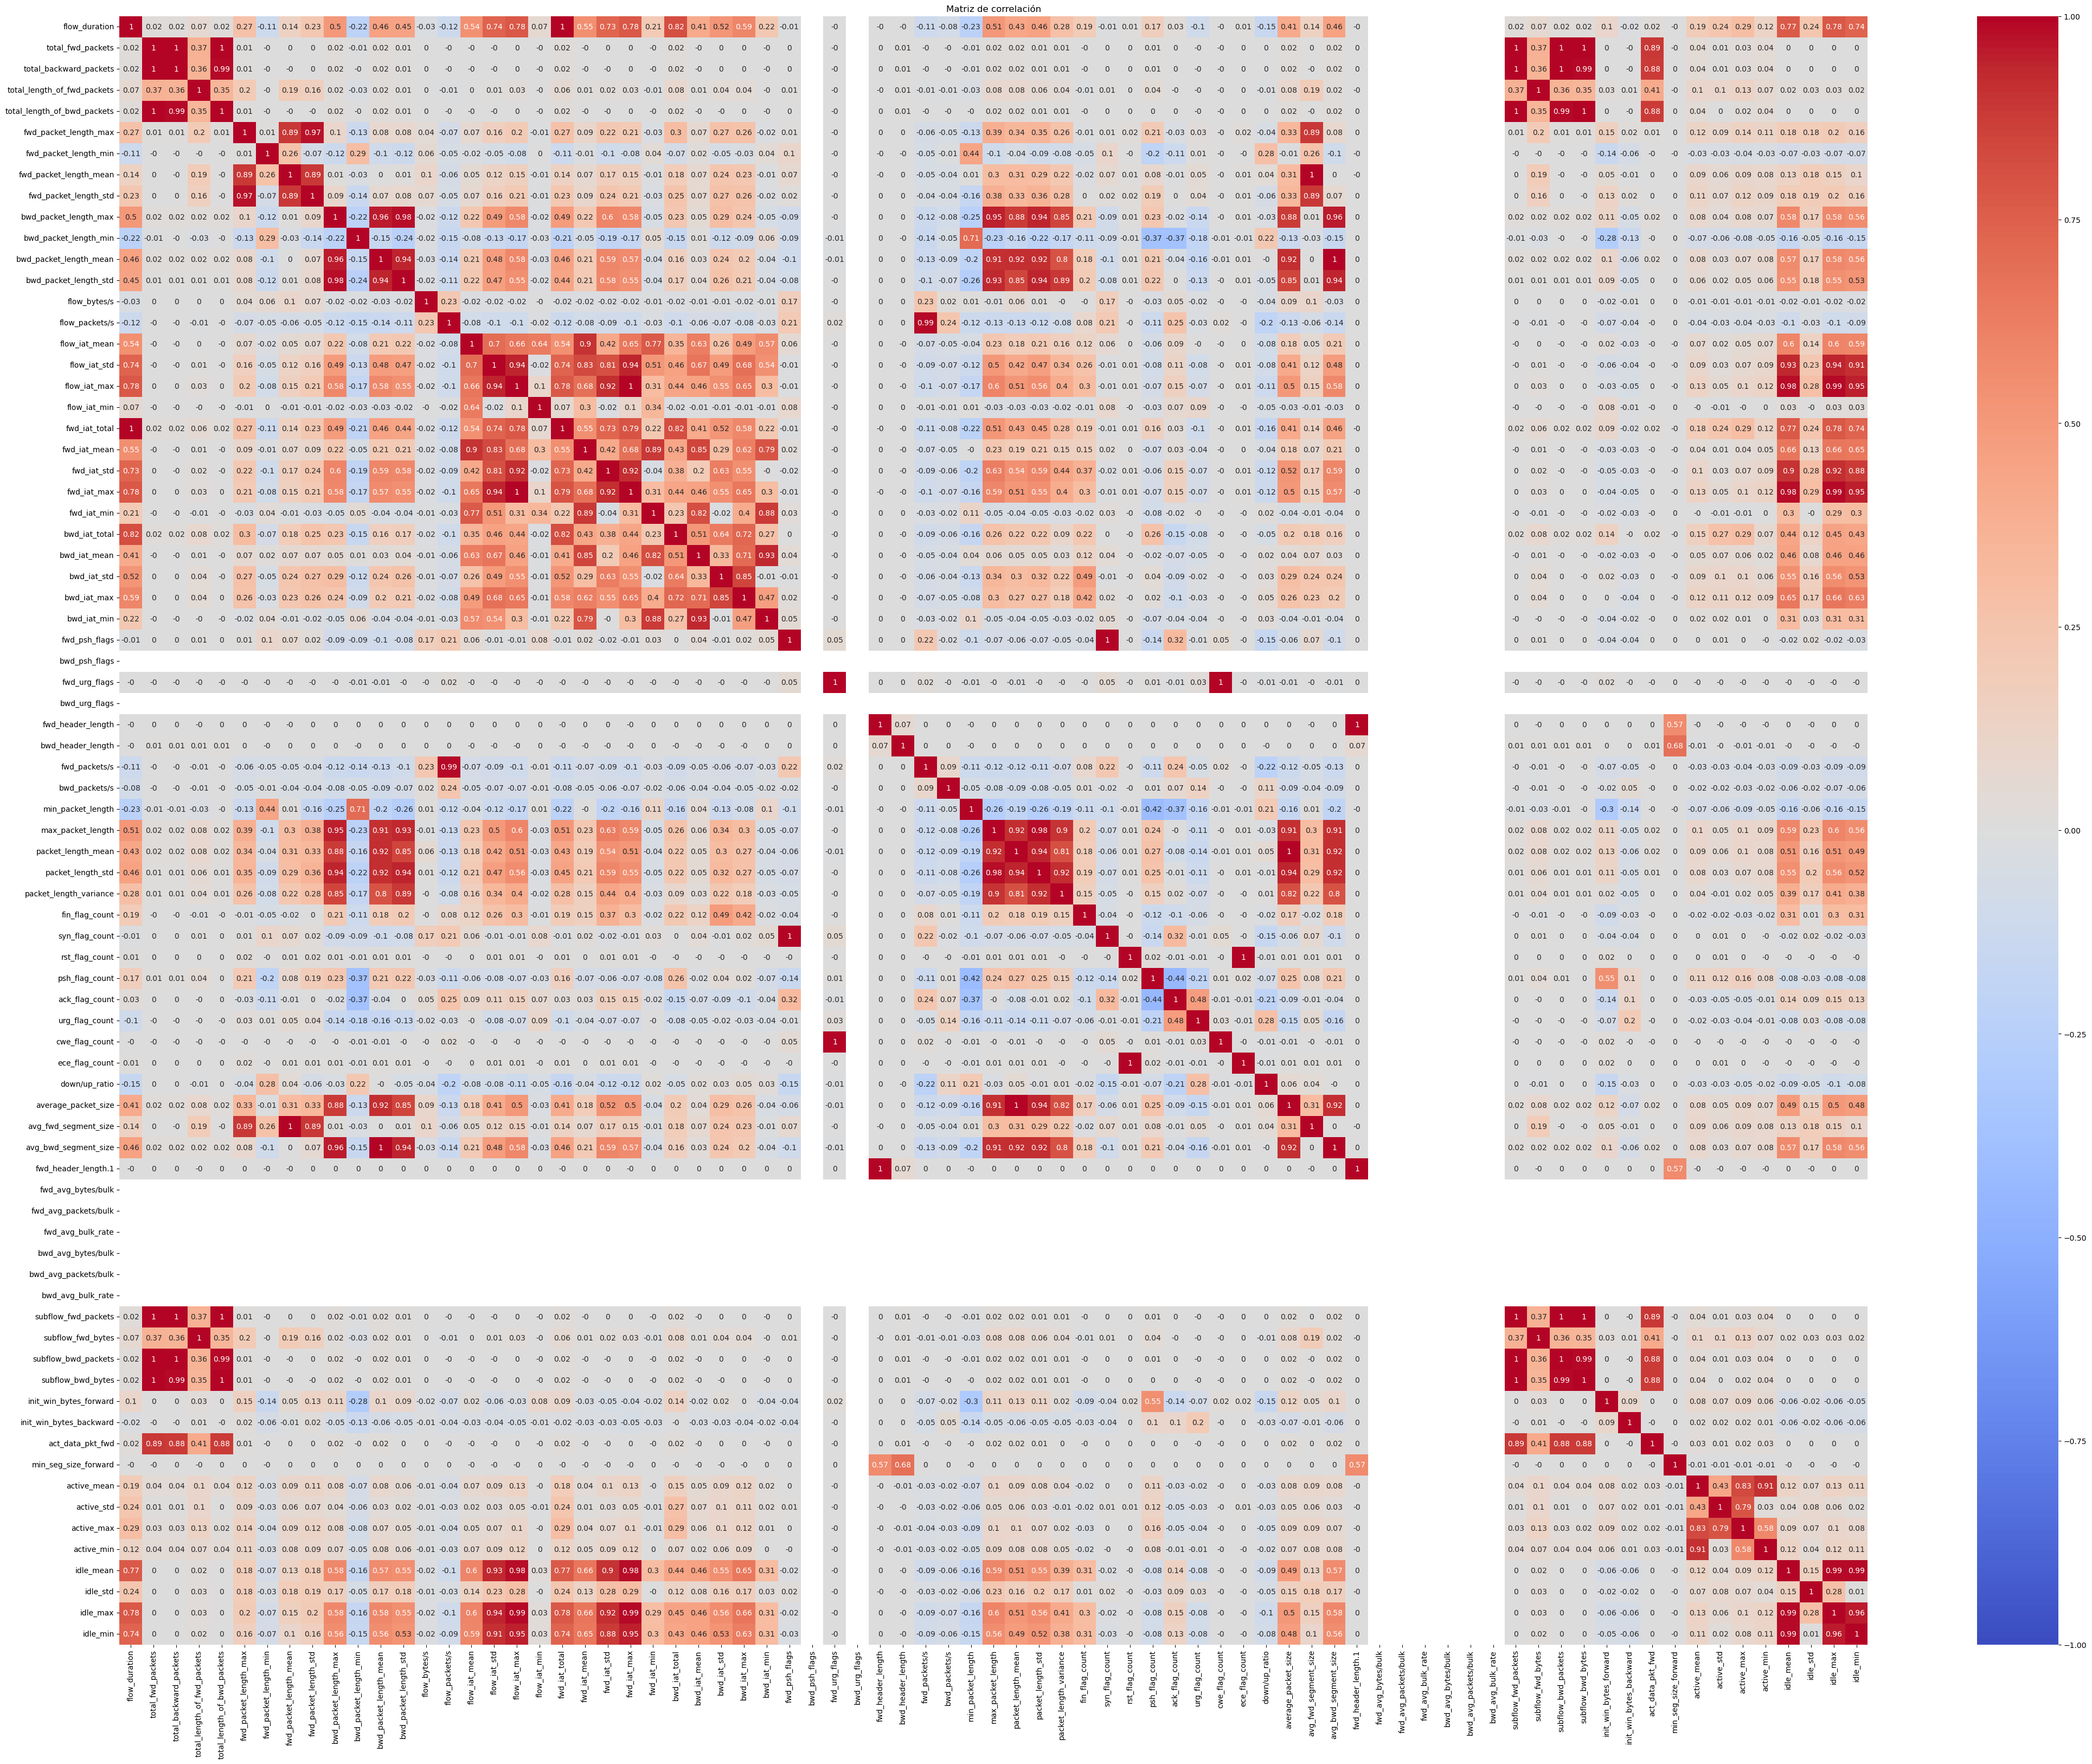

In [18]:
# Matriz de correlación general
# La matriz de correlación de Pandas sirve para evaluar la correlación entre variables cuantitativas, 
# por lo que puede ser no útil para variables cualitativas nominales como "label" y "destination_port"

matriz_correlacion = df.drop(["label", "destination_port"], axis=1).corr().round(decimals=2)

# Generar gráfico de mapa de calor para observar la correlación entre variables 
plt.figure(figsize=(52, 39))

sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Matriz de correlación")
plt.savefig("img/matriz_correlacion.png")
plt.show()

In [19]:
# revisión de características que no se evaluó su correlación 
caracteristicas_sin_evaluación = [
  "bwd_psh_flags", "bwd_urg_flags",
  "fwd_avg_bytes/bulk", "fwd_avg_packets/bulk", "fwd_avg_bulk_rate",
  "bwd_avg_bytes/bulk", "bwd_avg_packets/bulk", "bwd_avg_bulk_rate",
]

for i in caracteristicas_sin_evaluación : 
  print(f"""
        Característica: {i}
        {df[i].describe()}
  """)


        Característica: bwd_psh_flags
        count    2830743.0
mean           0.0
std            0.0
min            0.0
25%            0.0
50%            0.0
75%            0.0
max            0.0
Name: bwd_psh_flags, dtype: float64
  

        Característica: bwd_urg_flags
        count    2830743.0
mean           0.0
std            0.0
min            0.0
25%            0.0
50%            0.0
75%            0.0
max            0.0
Name: bwd_urg_flags, dtype: float64
  

        Característica: fwd_avg_bytes/bulk
        count    2830743.0
mean           0.0
std            0.0
min            0.0
25%            0.0
50%            0.0
75%            0.0
max            0.0
Name: fwd_avg_bytes/bulk, dtype: float64
  

        Característica: fwd_avg_packets/bulk
        count    2830743.0
mean           0.0
std            0.0
min            0.0
25%            0.0
50%            0.0
75%            0.0
max            0.0
Name: fwd_avg_packets/bulk, dtype: float64
  

        Característica:

In [20]:
# las características observadas no tienen información recopilada, por ello se eliminan del dataframe
df = df.drop(caracteristicas_sin_evaluación, axis=1)

#### 2.1. Distribución de variables

In [21]:
# Existen bastantes características numéricas, 
# A continuación, se observará la distribución de las variables para identificar que tipo de característica tiene cada uno
# Para hacer la evaluación, se excluyen las variables nominales "label" y "destination_port" 
df_caracteristicas_numéricas = df.drop(["label", "destination_port"], axis=1)

for i in df_caracteristicas_numéricas.columns.tolist() : 
  print(f"""
  Característica: {i}
  {df[i].describe()}
""")


  Característica: flow_duration
  count    2.830743e+06
mean     1.478566e+07
std      3.365374e+07
min     -1.300000e+01
25%      1.550000e+02
50%      3.131600e+04
75%      3.204828e+06
max      1.200000e+08
Name: flow_duration, dtype: float64


  Característica: total_fwd_packets
  count    2.830743e+06
mean     9.361160e+00
std      7.496728e+02
min      1.000000e+00
25%      2.000000e+00
50%      2.000000e+00
75%      5.000000e+00
max      2.197590e+05
Name: total_fwd_packets, dtype: float64


  Característica: total_backward_packets
  count    2.830743e+06
mean     1.039377e+01
std      9.973883e+02
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      4.000000e+00
max      2.919220e+05
Name: total_backward_packets, dtype: float64


  Característica: total_length_of_fwd_packets
  count    2.830743e+06
mean     5.493024e+02
std      9.993589e+03
min      0.000000e+00
25%      1.200000e+01
50%      6.200000e+01
75%      1.870000e+02
max      1.290000e+07
Name:

In [22]:
# Existen características que parecen tener valores binarios, se separarán dichas columnas en una lista
caracteristicas_categoricas_binarias = [
  "fwd_psh_flags", "fwd_urg_flags", 
  "fin_flag_count", "syn_flag_count", 
  "rst_flag_count", "psh_flag_count",
  "ack_flag_count", "urg_flag_count", 
  "cwe_flag_count", "ece_flag_count"
]

In [23]:
# Asimismo, existen dos características que tienen como valor máximo infinito, 
# esto puede resultar dificultoso para analizar por un algoritmo,
# más adelante se utilizará un algoritmo de escalado para adecuar dichos datos para el análisis
caracteristicas_vmax_inf = ["flow_bytes/s", "flow_packets/s"]

#### 2.2. Variables categóricas

In [24]:
# Visualización de variables categóricas binarias y nominales
caracteristicas_categoricas_nominales = [
  "destination_port",
  "label"
]

for i in caracteristicas_categoricas_binarias : 
  cant = df[i].unique()
  print(f"""
        Característica: {i}
        {cant}
        Cantidad: {len(cant)}
  """)

for i in caracteristicas_categoricas_nominales : 
  cant = df[i].unique()
  print(f"""
        Característica: {i}
        {cant}
        Cantidad: {len(cant)}
  """)


        Característica: fwd_psh_flags
        [0 1]
        Cantidad: 2
  

        Característica: fwd_urg_flags
        [0 1]
        Cantidad: 2
  

        Característica: fin_flag_count
        [0 1]
        Cantidad: 2
  

        Característica: syn_flag_count
        [0 1]
        Cantidad: 2
  

        Característica: rst_flag_count
        [0 1]
        Cantidad: 2
  

        Característica: psh_flag_count
        [0 1]
        Cantidad: 2
  

        Característica: ack_flag_count
        [1 0]
        Cantidad: 2
  

        Característica: urg_flag_count
        [1 0]
        Cantidad: 2
  

        Característica: cwe_flag_count
        [0 1]
        Cantidad: 2
  

        Característica: ece_flag_count
        [0 1]
        Cantidad: 2
  

        Característica: destination_port
        [49188 49486    88 ... 10743 10322 10326]
        Cantidad: 53805
  

        Característica: label
        ['BENIGN' 'FTP_PATATOR' 'SSH_PATATOR' 'DOS_SLOWLORIS' 'DOS_SLOWHTTPTEST'
 

#### 2.3. Variables continuas

##### Histograma y boxplot de variables continuas

In [25]:
# A continuación, observamos la distribución de las variables continuas

#Filtramos las características para obtener las variables numéricas
caracteristicas_numericas = [x for x in df.columns if x not in caracteristicas_vmax_inf]
caracteristicas_numericas = [x for x in caracteristicas_numericas if x not in caracteristicas_categoricas_binarias]
caracteristicas_numericas = [x for x in caracteristicas_numericas if x not in caracteristicas_categoricas_nominales]

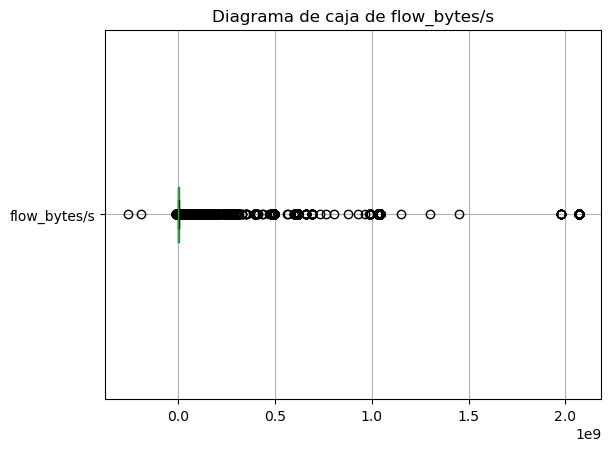

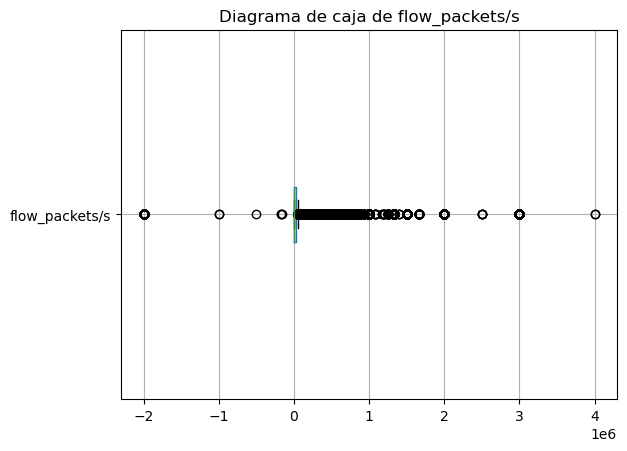

In [26]:
for i in caracteristicas_vmax_inf : 
  # df[i].hist(bins=10)
  # plt.title(f"Histograma de {i}")
  # plt.xlabel(i)
  # plt.ylabel("Frecuencia")
  # plt.show()

  df.boxplot(column=i, vert=False)
  plt.title(f"Diagrama de caja de {i}")
  plt.show()

### 3. Resumen de tipos de variables del dataset

In [27]:
print(f"""
Características que no son útiles para el análisis
{caracteristicas_sin_evaluación}
Cantidad: {len(caracteristicas_sin_evaluación)}

Características continuas: 
  {caracteristicas_numericas}
  Cantidad: {len(caracteristicas_numericas)}
  Tienen un valor máximo no apto para entrenar modelos: 
  {caracteristicas_vmax_inf}
  Cantidad: {len(caracteristicas_vmax_inf)}
  
Características categóricas:
  Binarias: 
  {caracteristicas_categoricas_binarias}
  Cantidad: {len(caracteristicas_categoricas_binarias)}
  Nominales: 
  {caracteristicas_categoricas_nominales}
  Cantidad: {len(caracteristicas_categoricas_nominales)}
""")


Características que no son útiles para el análisis
['bwd_psh_flags', 'bwd_urg_flags', 'fwd_avg_bytes/bulk', 'fwd_avg_packets/bulk', 'fwd_avg_bulk_rate', 'bwd_avg_bytes/bulk', 'bwd_avg_packets/bulk', 'bwd_avg_bulk_rate']
Cantidad: 8

Características continuas: 
  ['flow_duration', 'total_fwd_packets', 'total_backward_packets', 'total_length_of_fwd_packets', 'total_length_of_bwd_packets', 'fwd_packet_length_max', 'fwd_packet_length_min', 'fwd_packet_length_mean', 'fwd_packet_length_std', 'bwd_packet_length_max', 'bwd_packet_length_min', 'bwd_packet_length_mean', 'bwd_packet_length_std', 'flow_iat_mean', 'flow_iat_std', 'flow_iat_max', 'flow_iat_min', 'fwd_iat_total', 'fwd_iat_mean', 'fwd_iat_std', 'fwd_iat_max', 'fwd_iat_min', 'bwd_iat_total', 'bwd_iat_mean', 'bwd_iat_std', 'bwd_iat_max', 'bwd_iat_min', 'fwd_header_length', 'bwd_header_length', 'fwd_packets/s', 'bwd_packets/s', 'min_packet_length', 'max_packet_length', 'packet_length_mean', 'packet_length_std', 'packet_length_variance',

### 4. Análisis de variables continuas

In [28]:
for i in df.drop(["label", "destination_port"], axis=1).columns.tolist() : 
  print(f"""
Característica: {i}
{df[i].describe()}
""")


Característica: flow_duration
count    2.830743e+06
mean     1.478566e+07
std      3.365374e+07
min     -1.300000e+01
25%      1.550000e+02
50%      3.131600e+04
75%      3.204828e+06
max      1.200000e+08
Name: flow_duration, dtype: float64


Característica: total_fwd_packets
count    2.830743e+06
mean     9.361160e+00
std      7.496728e+02
min      1.000000e+00
25%      2.000000e+00
50%      2.000000e+00
75%      5.000000e+00
max      2.197590e+05
Name: total_fwd_packets, dtype: float64


Característica: total_backward_packets
count    2.830743e+06
mean     1.039377e+01
std      9.973883e+02
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      4.000000e+00
max      2.919220e+05
Name: total_backward_packets, dtype: float64


Característica: total_length_of_fwd_packets
count    2.830743e+06
mean     5.493024e+02
std      9.993589e+03
min      0.000000e+00
25%      1.200000e+01
50%      6.200000e+01
75%      1.870000e+02
max      1.290000e+07
Name: total_length_of

#### 4.1. Normalización de variables numéricas

In [29]:
df_normalizado = df[caracteristicas_categoricas_nominales].copy()

for i in caracteristicas_numericas : 
  df_normalizado[f"{i}_normalized"] = (df[i] - df[i].min()) / (df[i].max() - df[i].min())
  print(f"""
Característica: {i}_normalized
{df_normalizado[f"{i}_normalized"].describe()}
""")


Característica: flow_duration_normalized
count    2.830743e+06
mean     1.232140e-01
std      2.804478e-01
min      0.000000e+00
25%      1.400000e-06
50%      2.610750e-04
75%      2.670701e-02
max      1.000000e+00
Name: flow_duration_normalized, dtype: float64


Característica: total_fwd_packets_normalized
count    2.830743e+06
mean     3.804712e-05
std      3.411356e-03
min      0.000000e+00
25%      4.550460e-06
50%      4.550460e-06
75%      1.820184e-05
max      1.000000e+00
Name: total_fwd_packets_normalized, dtype: float64


Característica: total_backward_packets_normalized
count    2.830743e+06
mean     3.560461e-05
std      3.416626e-03
min      0.000000e+00
25%      3.425573e-06
50%      6.851145e-06
75%      1.370229e-05
max      1.000000e+00
Name: total_backward_packets_normalized, dtype: float64


Característica: total_length_of_fwd_packets_normalized
count    2.830743e+06
mean     4.258158e-05
std      7.746968e-04
min      0.000000e+00
25%      9.302326e-07
50%      4

#### 4.2. Matriz de correlación 

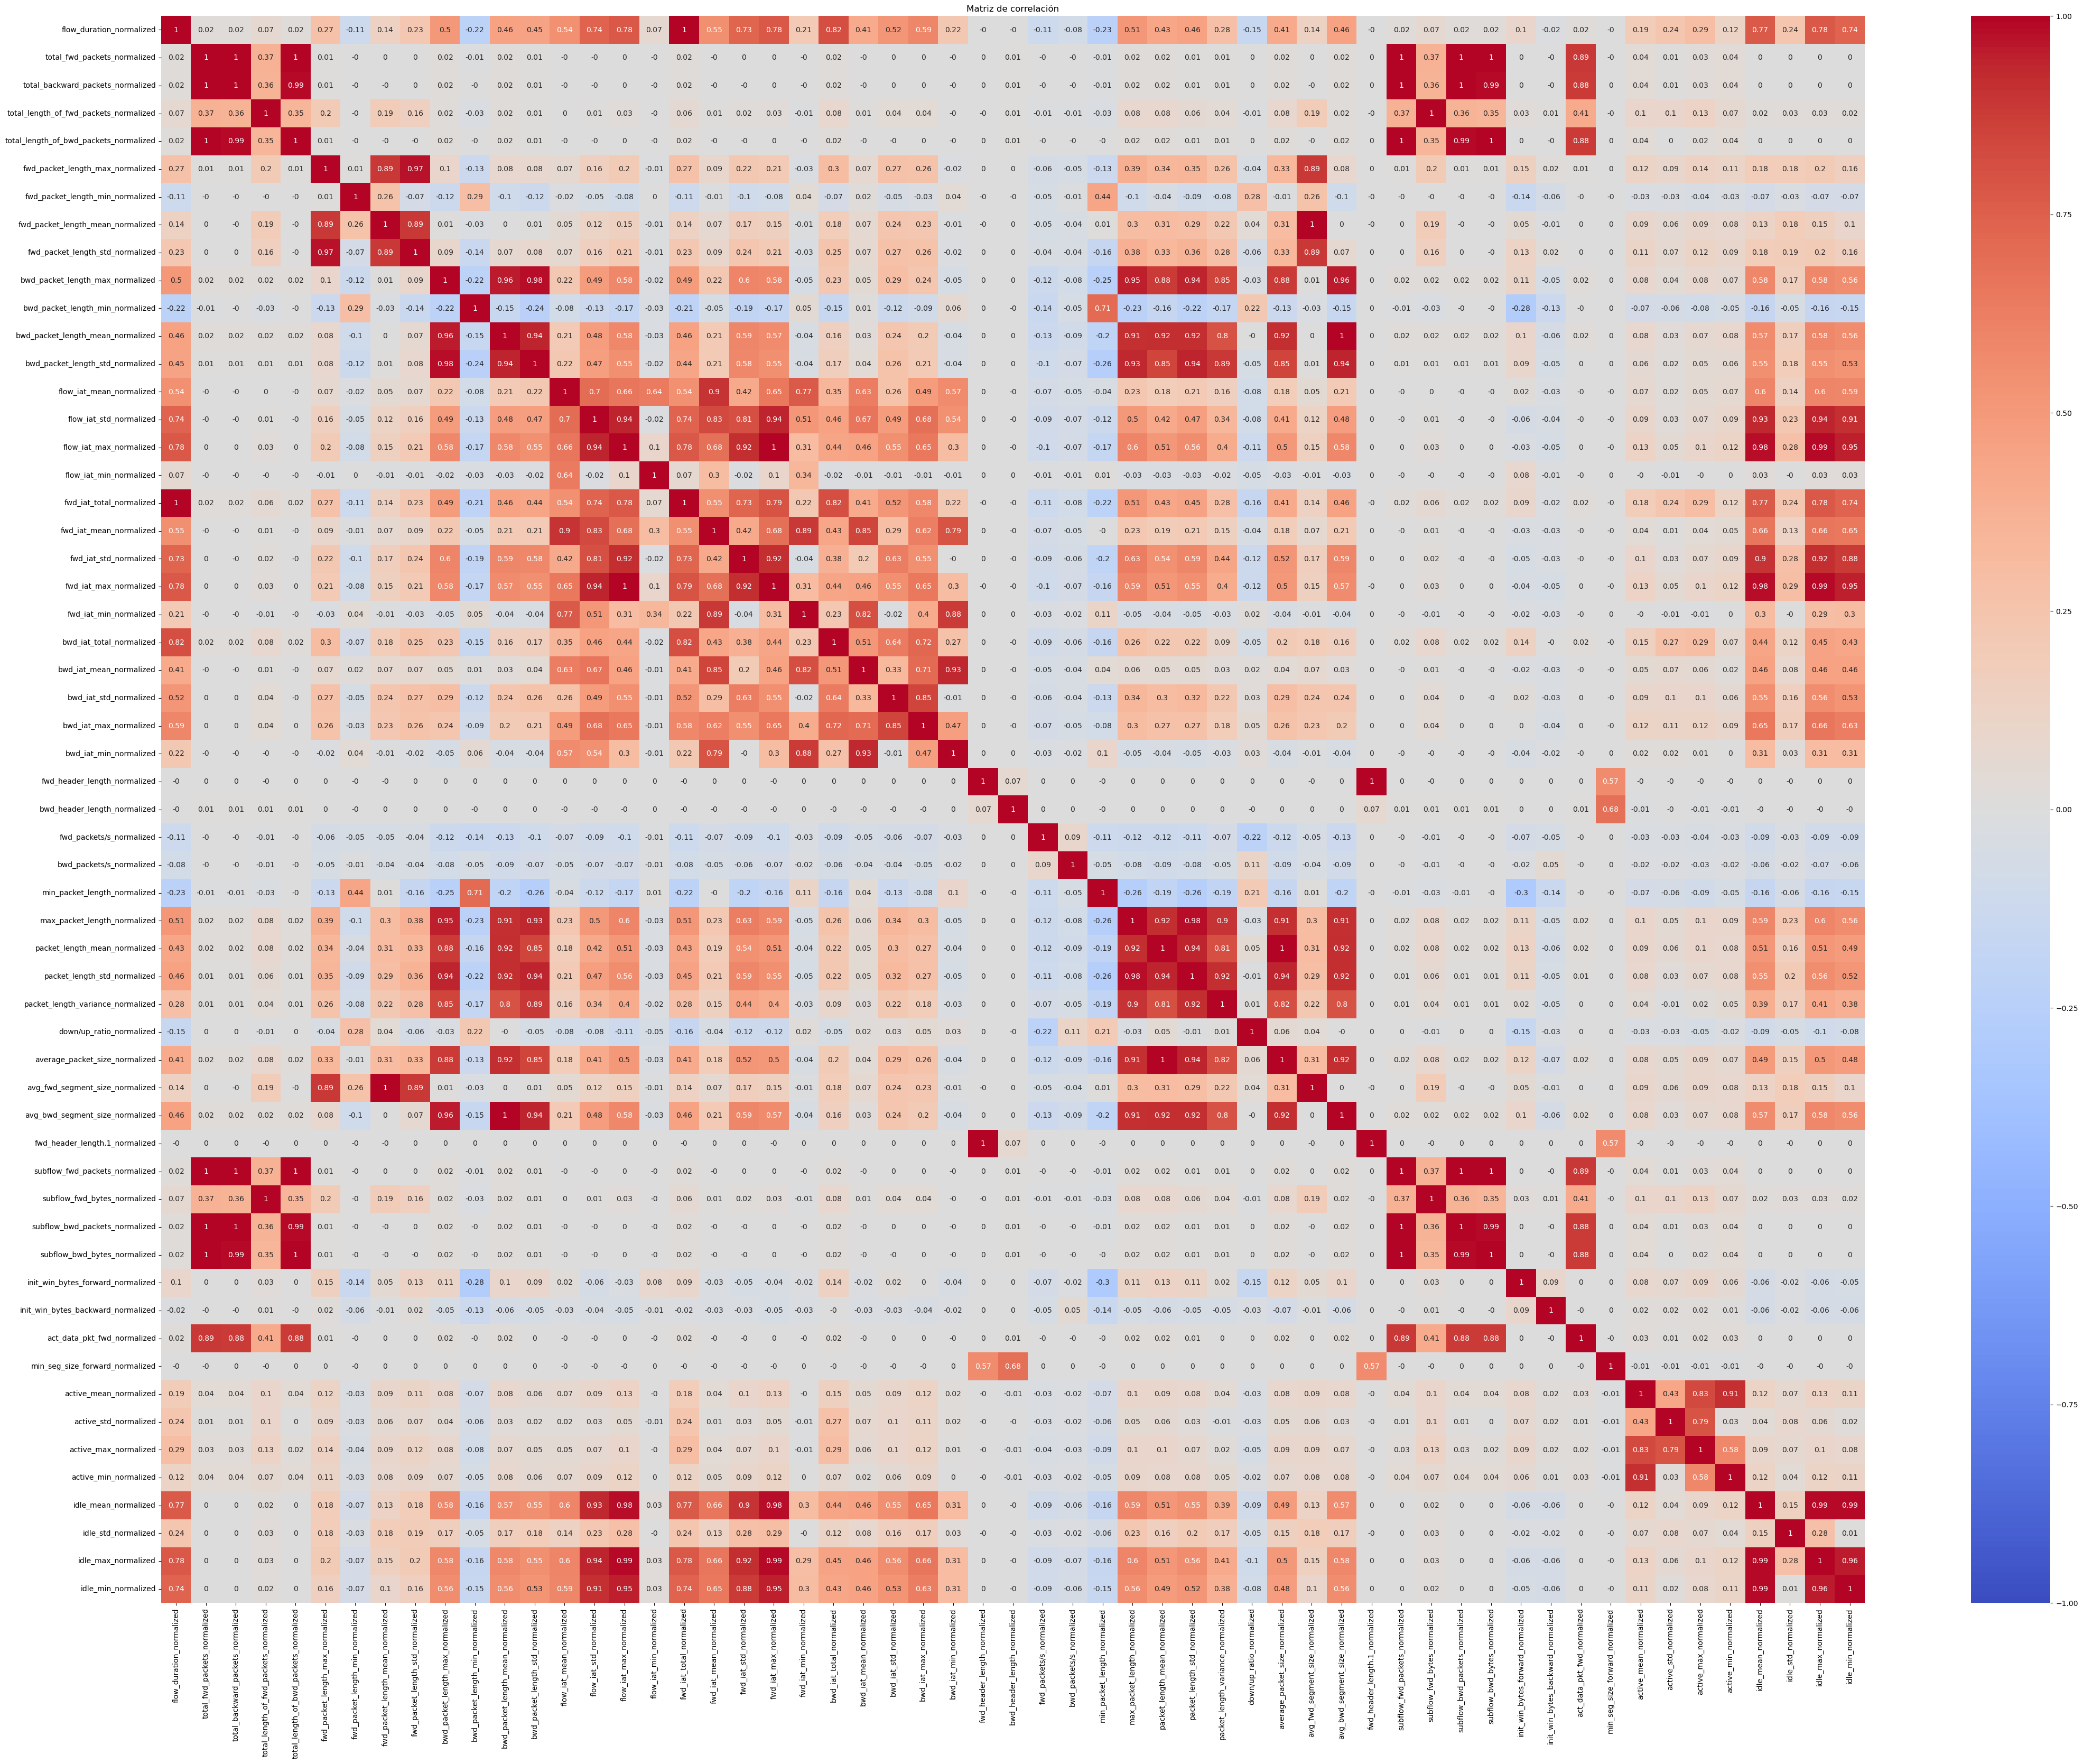

In [30]:
# Nueva matriz de correlación
matriz_correlacion = df_normalizado.drop(["label", "destination_port"], axis=1).corr().round(decimals=2)

# Nuevamente generar gráfico de mapa de calor para observar la correlación excluyendo las variables que no capturaron datos 
plt.figure(figsize=(52, 39))

sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Matriz de correlación")
plt.savefig("img/matriz_correlacion_caracteristicas_excluidas.png")
plt.show()

#### 4.3. Boxplots

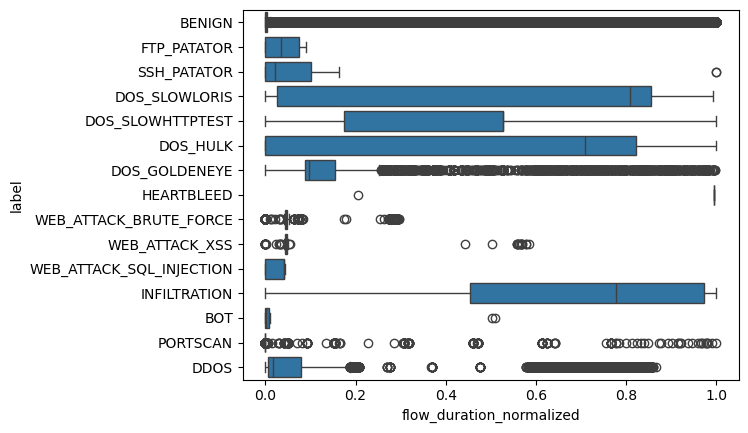

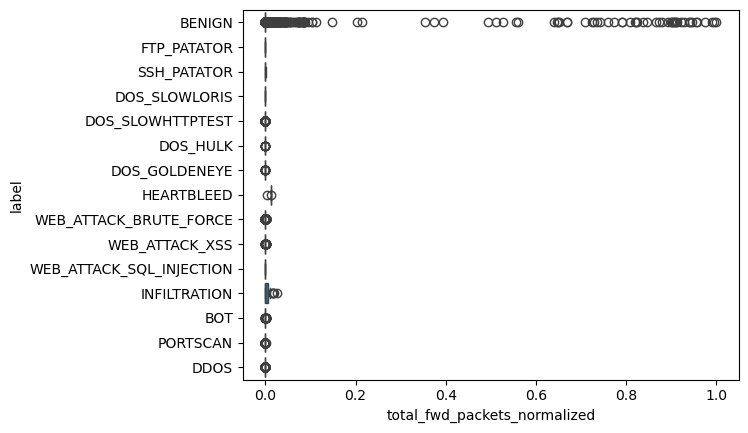

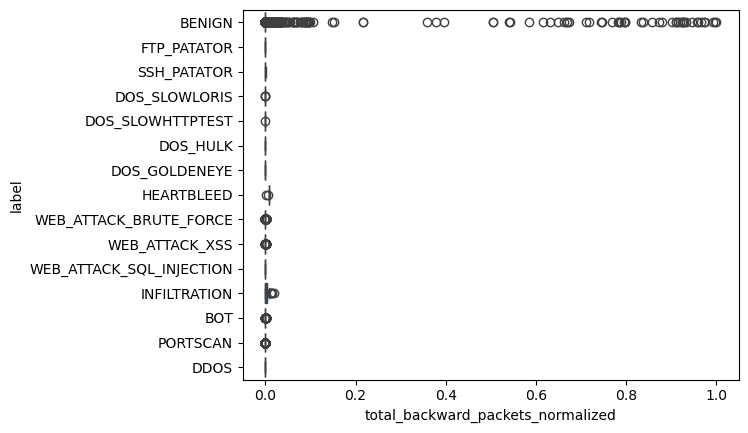

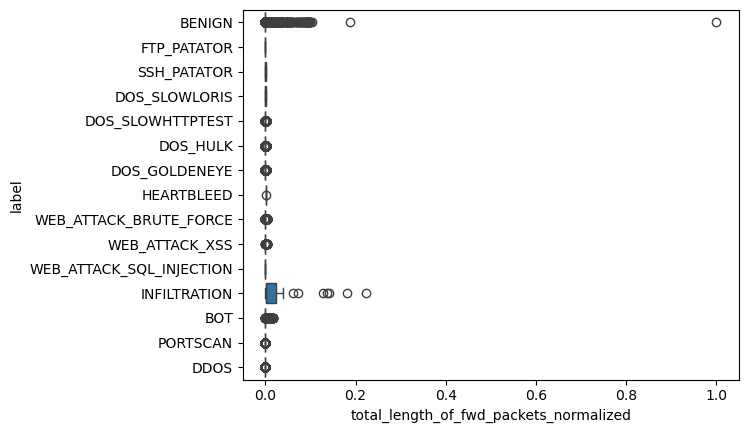

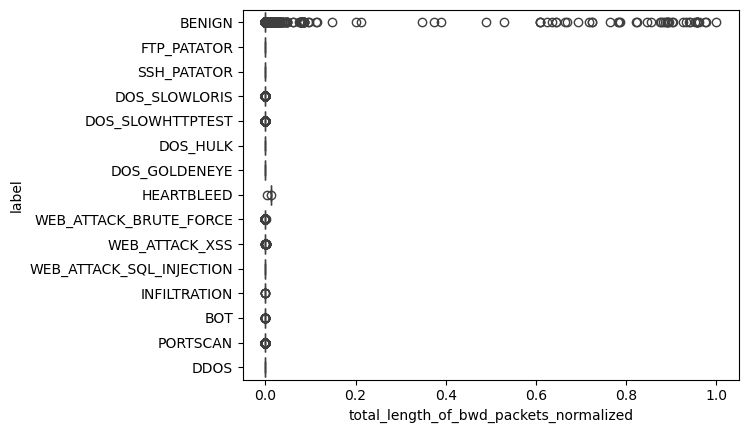

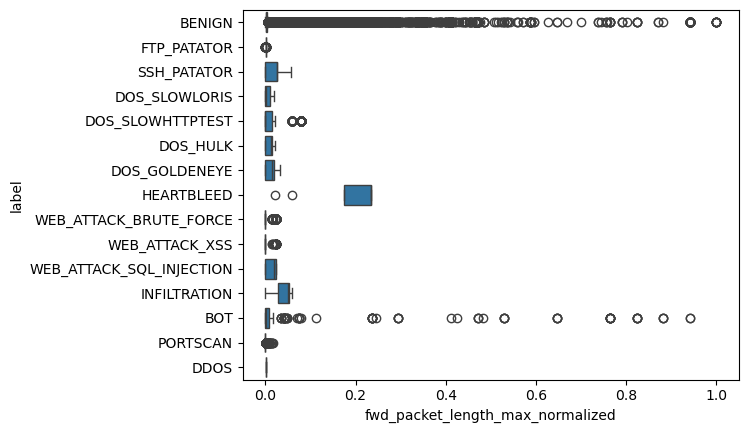

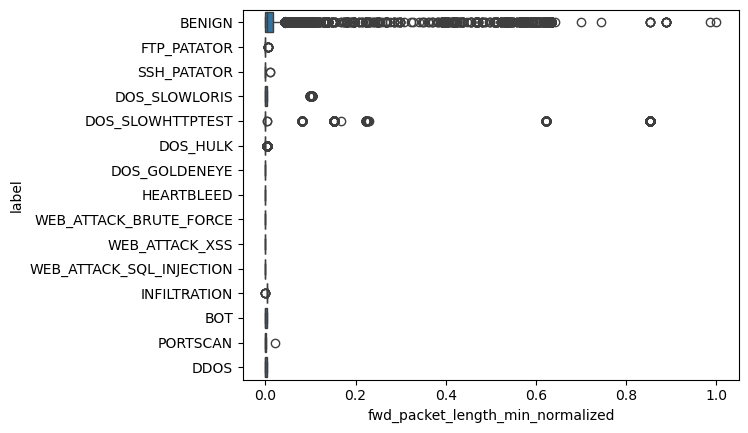

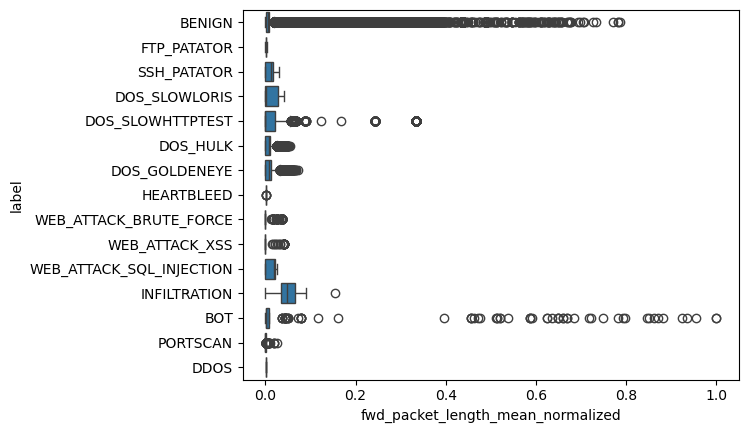

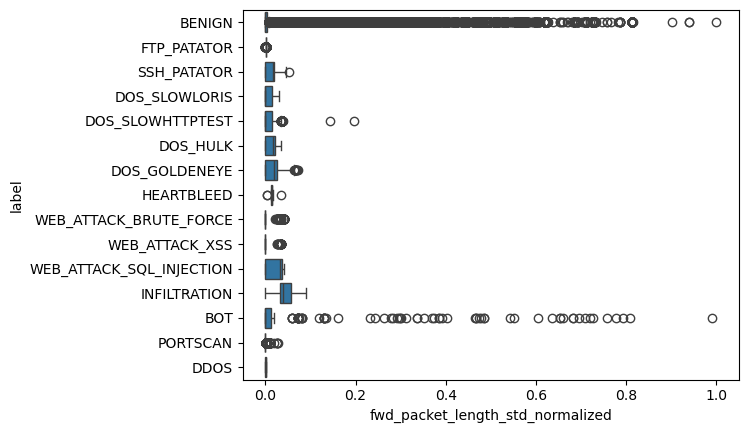

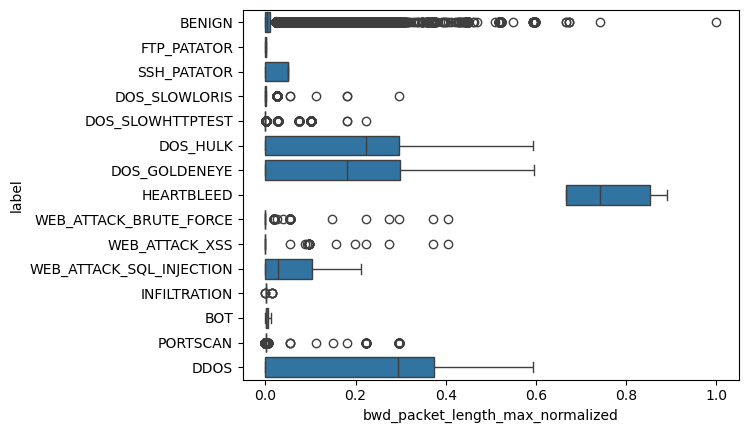

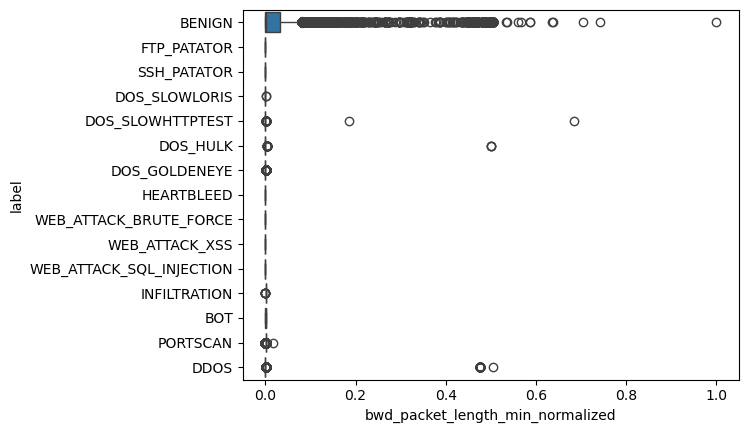

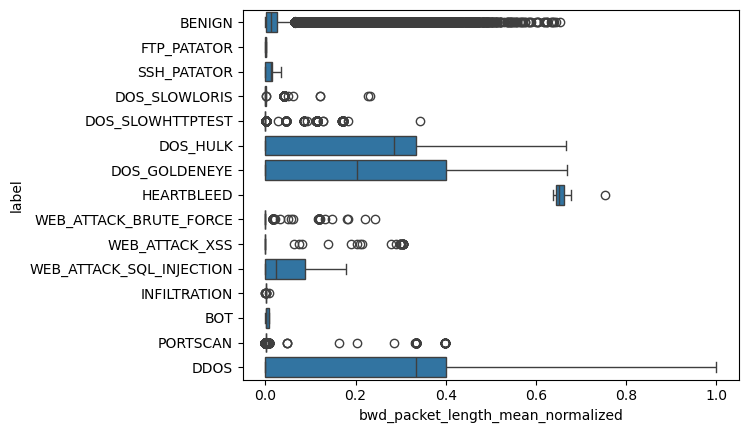

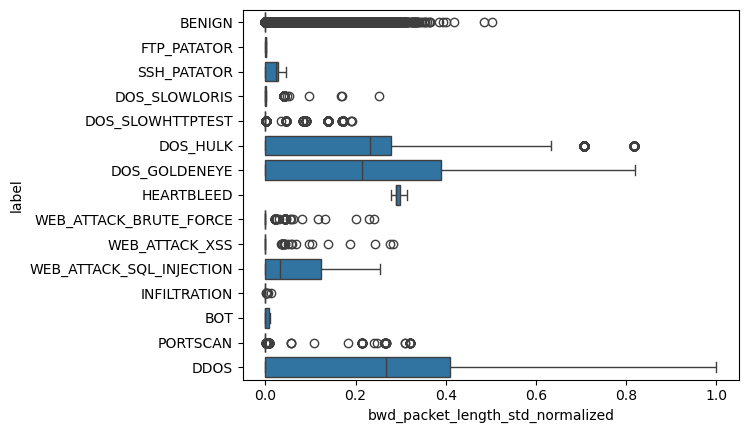

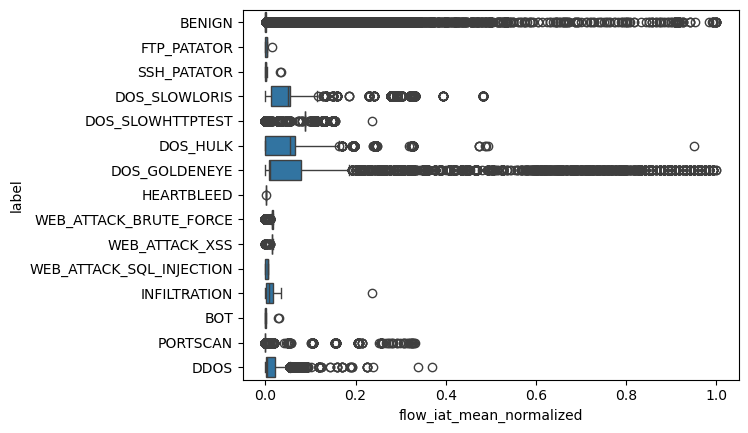

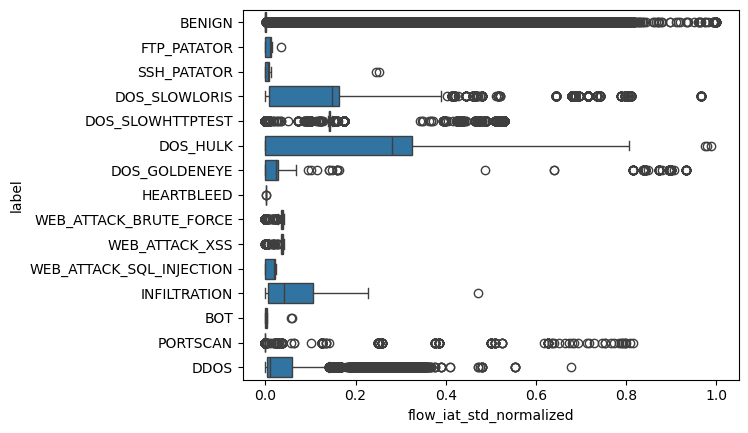

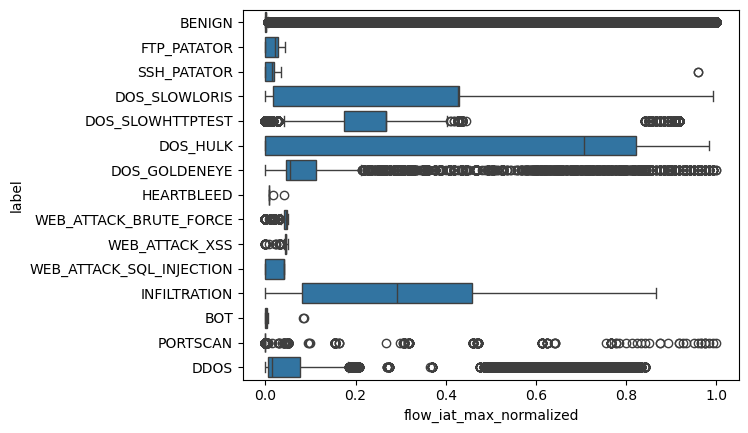

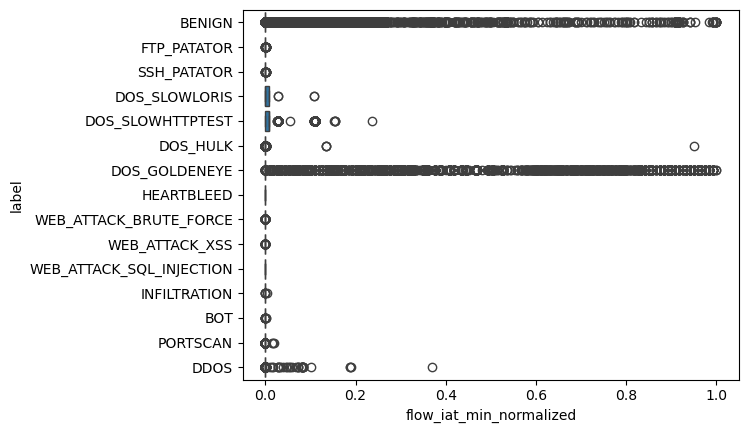

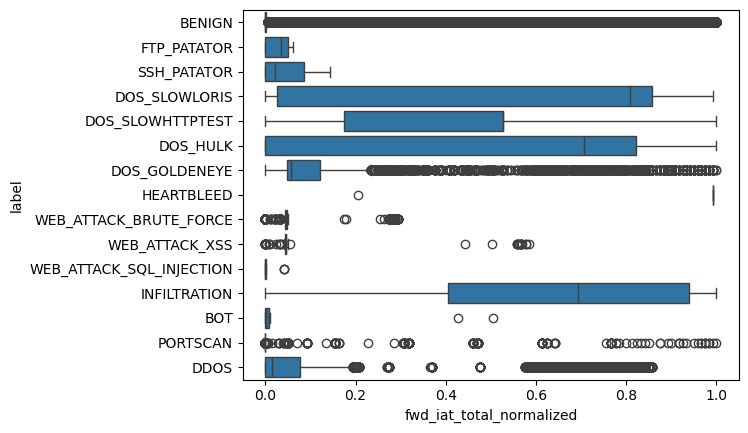

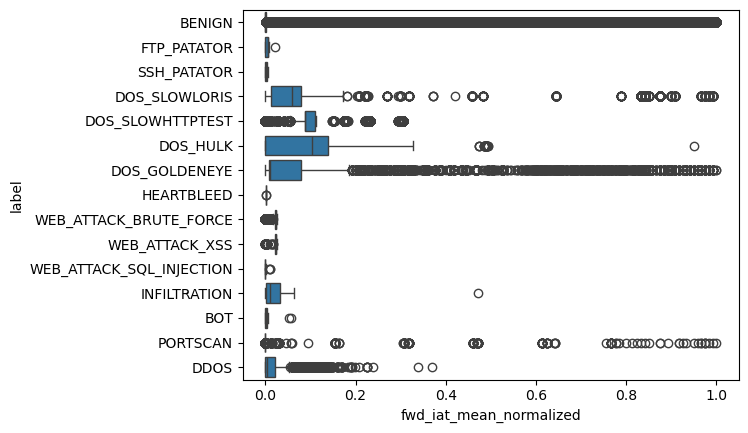

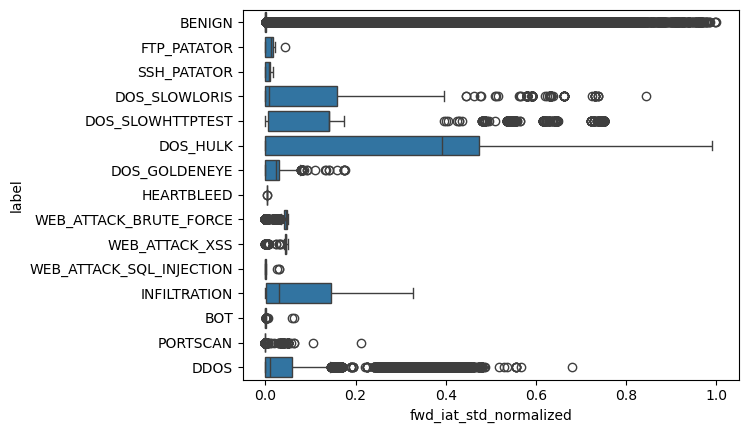

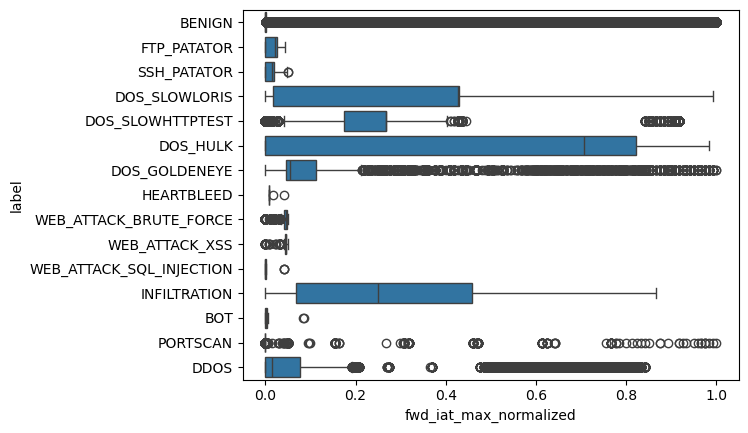

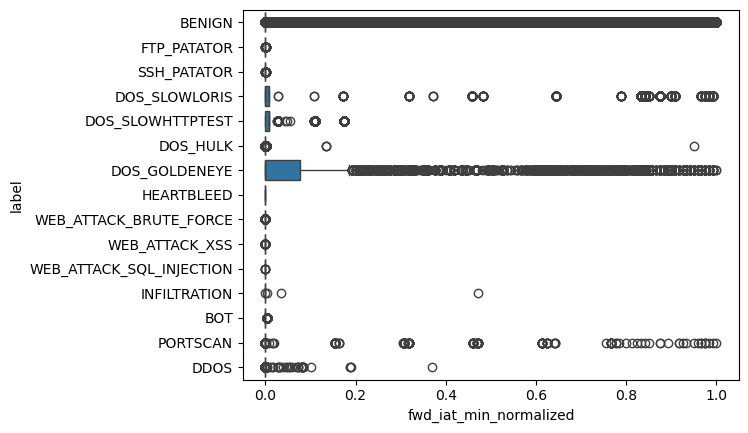

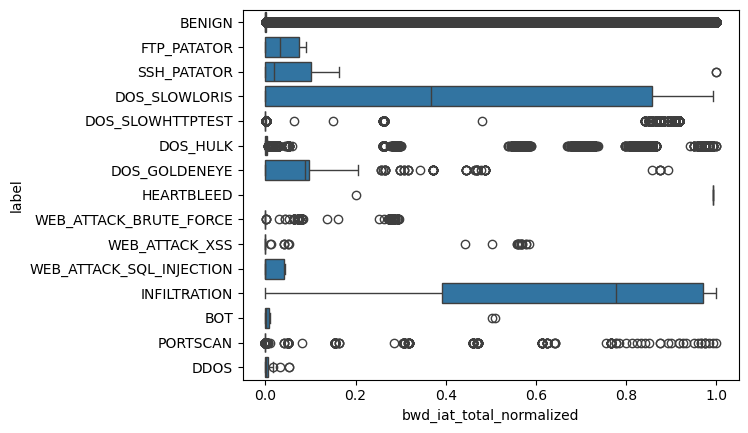

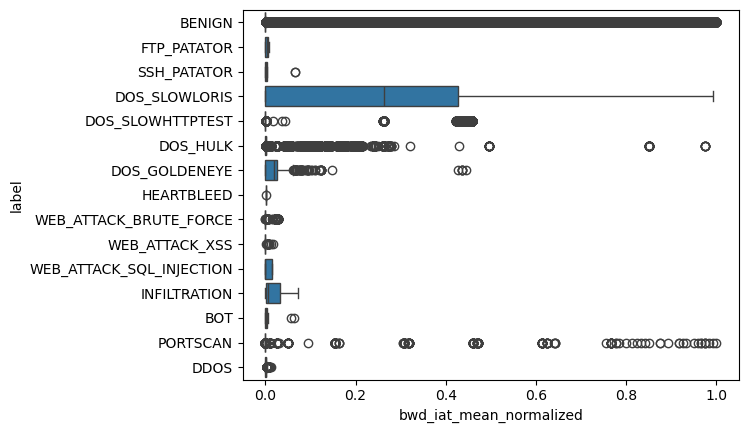

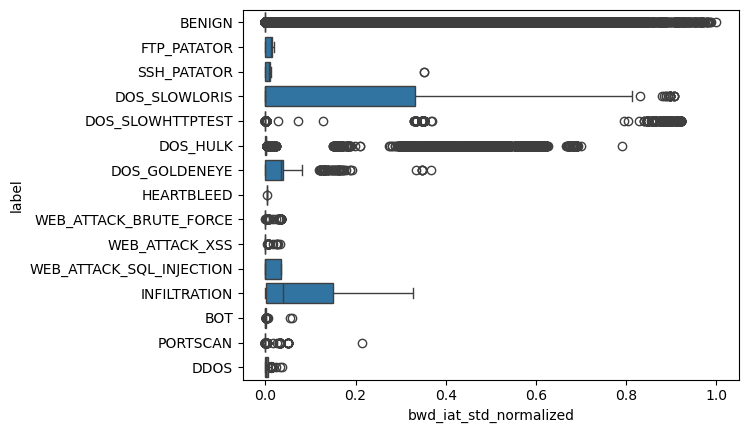

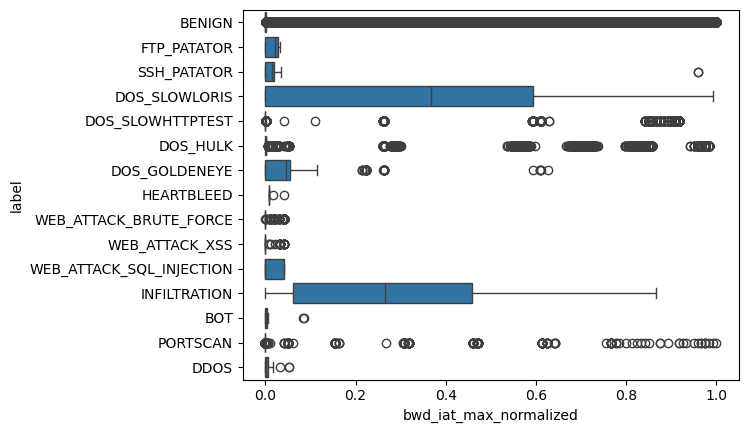

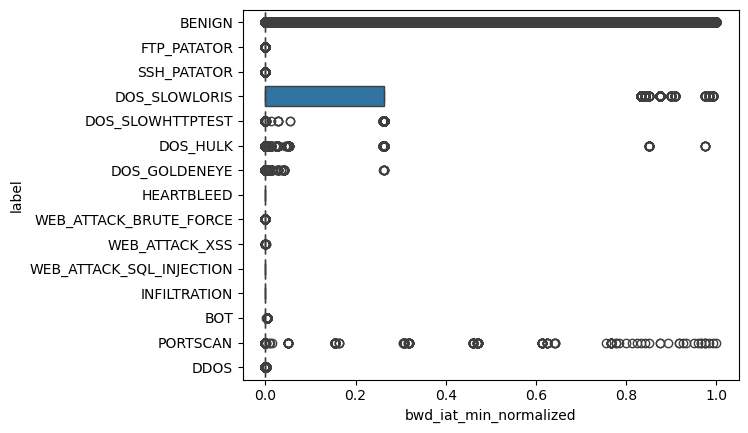

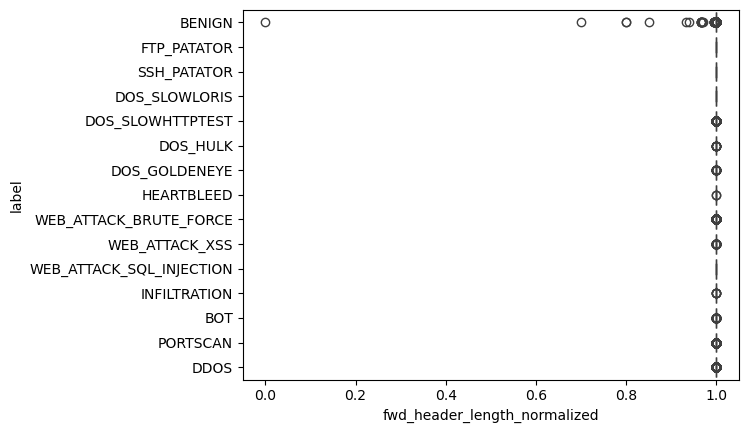

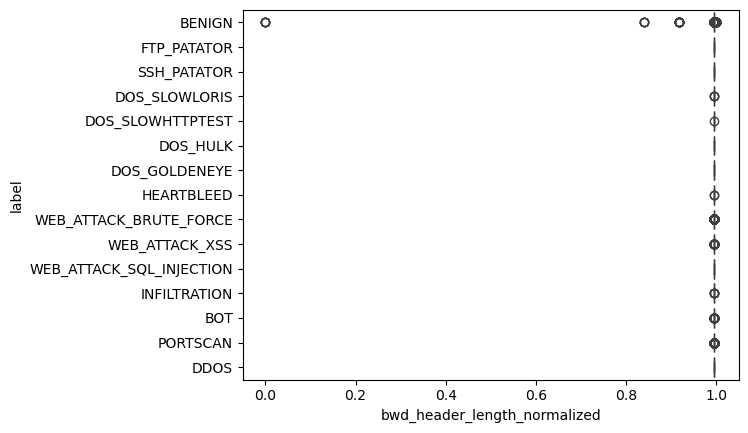

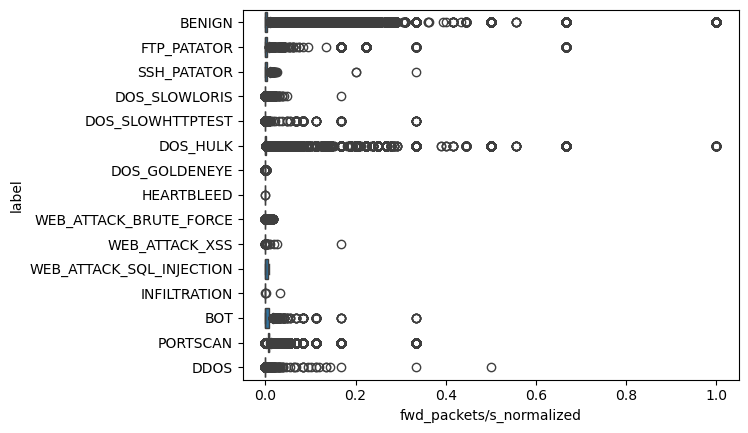

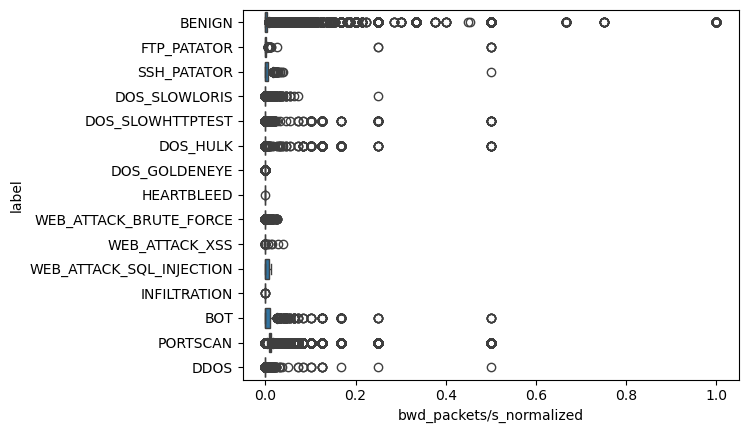

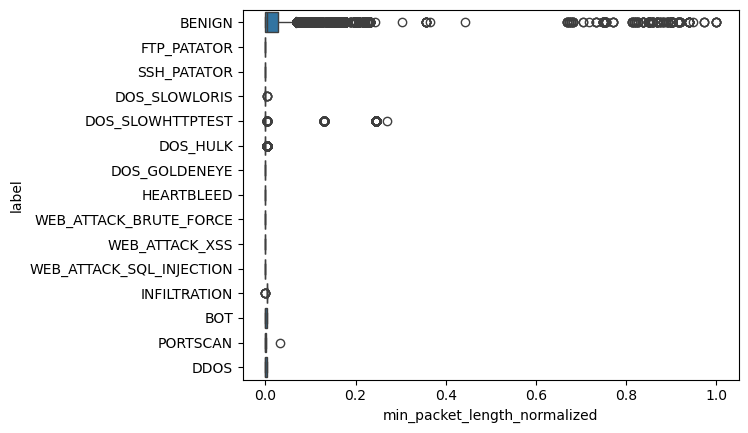

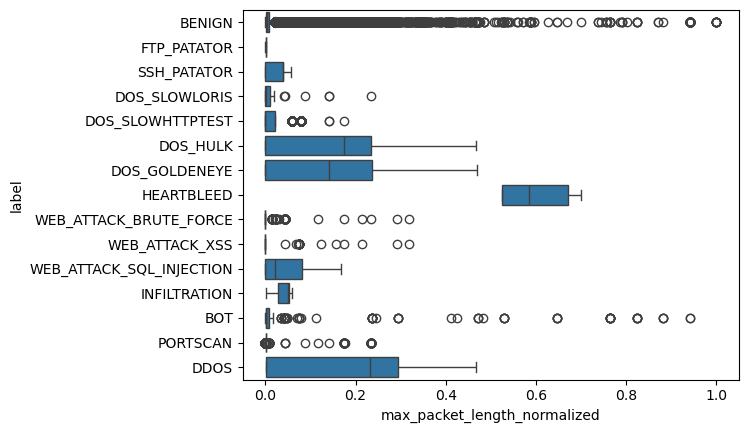

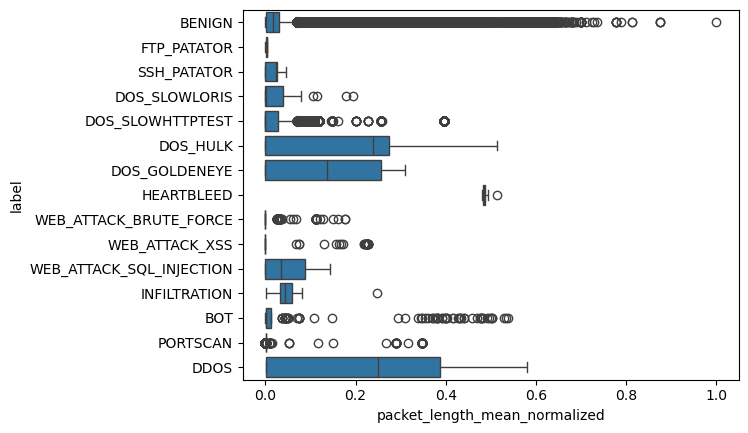

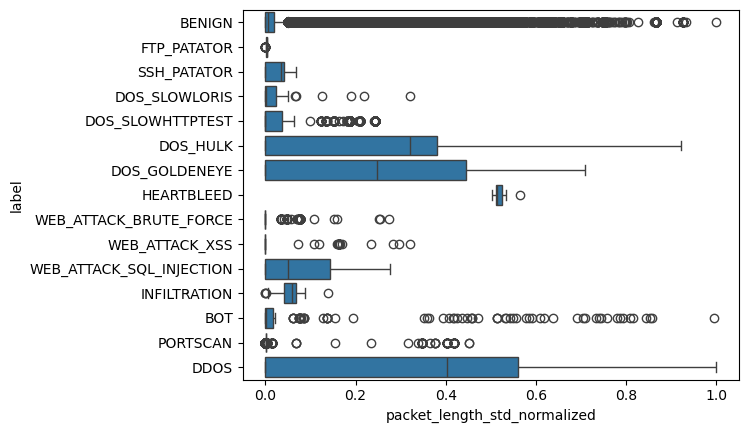

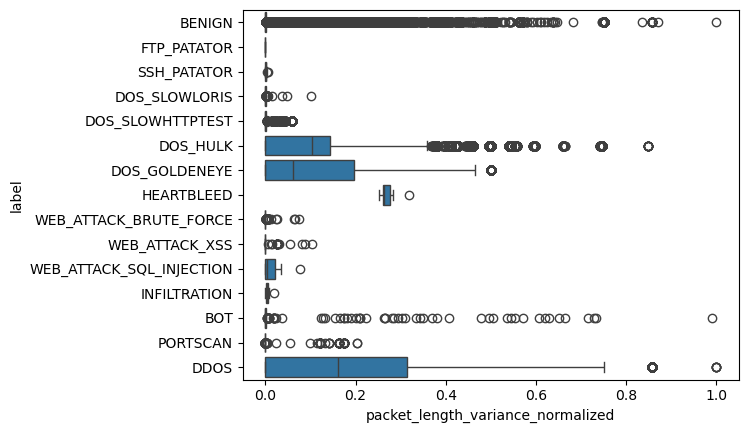

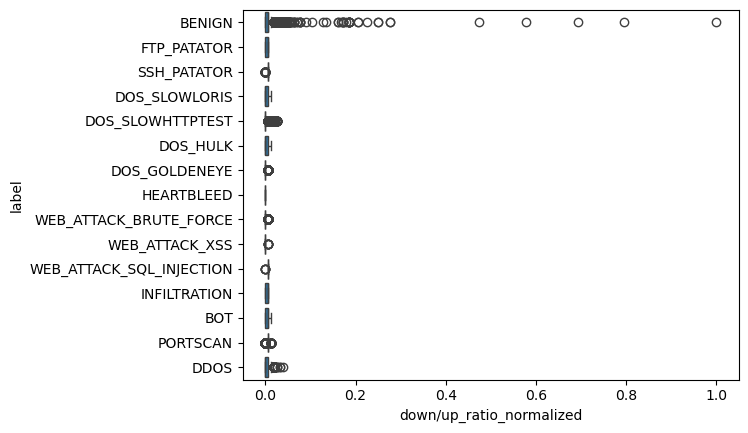

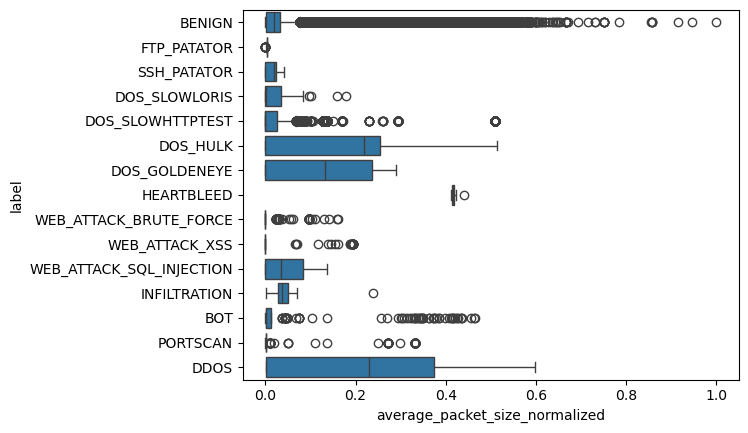

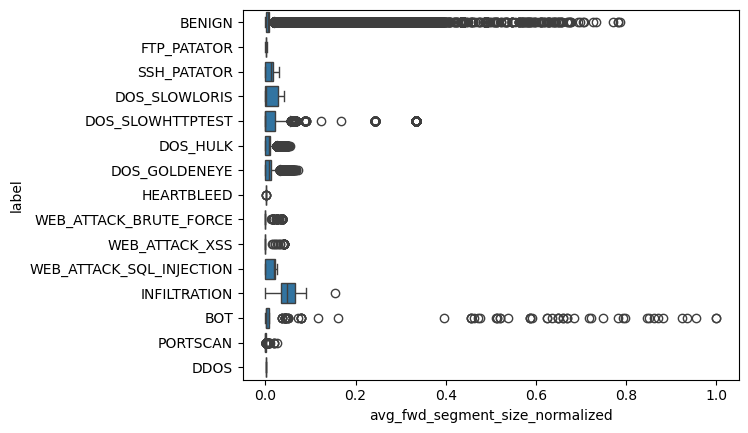

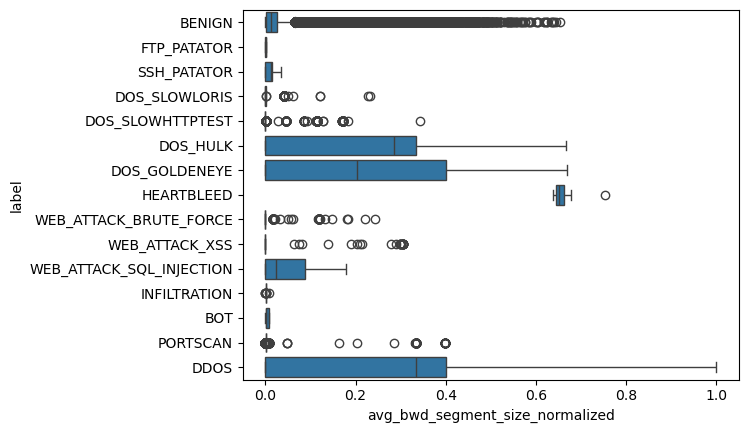

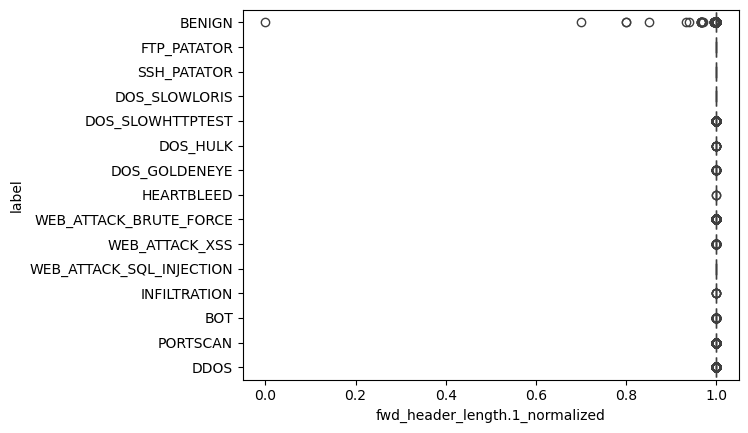

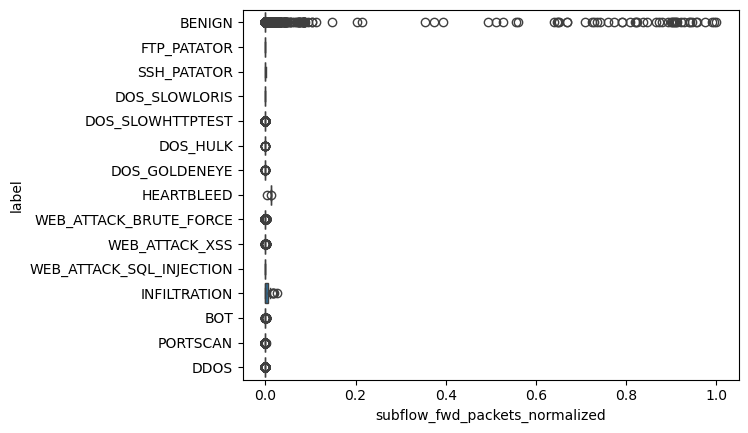

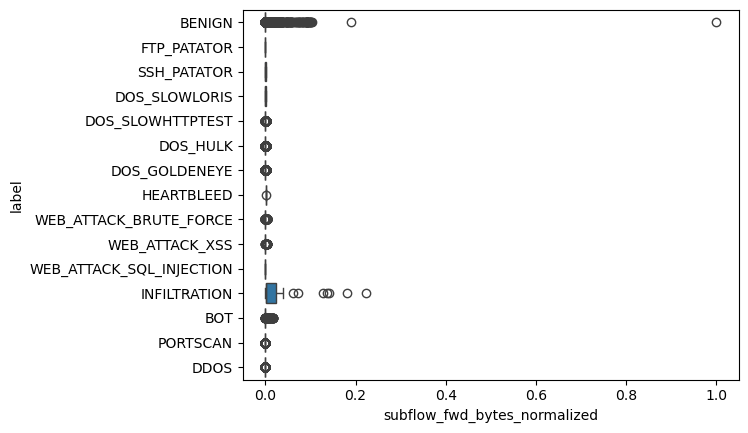

In [ ]:

for i in df_normalizado.drop(columns=["destination_port", "label"], axis=1).columns : 
    sns.boxplot(x=i, y='label', data=df_normalizado)

    plt.xlabel(i)
    plt.ylabel("label")
    plt.show()